Dataset Preview:
  Company Name            Model Name Mobile Weight  RAM Front Camera  \
0        Apple       iPhone 16 128GB          174g  6GB         12MP   
1        Apple       iPhone 16 256GB          174g  6GB         12MP   
2        Apple       iPhone 16 512GB          174g  6GB         12MP   
3        Apple  iPhone 16 Plus 128GB          203g  6GB         12MP   
4        Apple  iPhone 16 Plus 256GB          203g  6GB         12MP   

  Back Camera   Processor Battery Capacity Screen Size  \
0        48MP  A17 Bionic         3,600mAh  6.1 inches   
1        48MP  A17 Bionic         3,600mAh  6.1 inches   
2        48MP  A17 Bionic         3,600mAh  6.1 inches   
3        48MP  A17 Bionic         4,200mAh  6.7 inches   
4        48MP  A17 Bionic         4,200mAh  6.7 inches   

  Launched Price (Pakistan) Launched Price (India) Launched Price (China)  \
0               PKR 224,999             INR 79,999              CNY 5,799   
1               PKR 234,999             INR 84,

<ipython-input-14-7b130f2d4474>:28: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].mode()[0], inplace=True) # Fill with mode for non-numeric columns
<ipython-input-14-7b130f2d4474>:26: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing


Model Accuracy: 0.6612903225806451

Classification Report:
               precision    recall  f1-score   support

        2016       0.00      0.00      0.00         1
        2017       1.00      0.50      0.67         2
        2018       1.00      0.80      0.89         5
        2019       0.78      0.64      0.70        11
        2020       0.63      0.71      0.67        17
        2021       0.65      0.61      0.63        18
        2022       0.50      0.32      0.39        28
        2023       0.52      0.48      0.50        31
        2024       0.72      0.90      0.80        70
        2025       1.00      0.33      0.50         3

    accuracy                           0.66       186
   macro avg       0.68      0.53      0.57       186
weighted avg       0.65      0.66      0.64       186



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


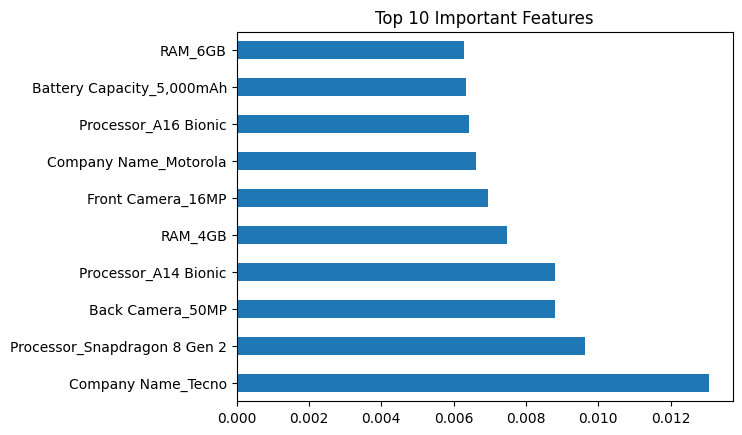

In [14]:
# Install necessary libraries (if not already installed)
!pip install pandas scikit-learn seaborn matplotlib

# Import required modules
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load dataset
df = pd.read_csv("Mobiles Dataset.csv", encoding='latin-1')  # Try 'latin-1' encoding
# If 'latin-1' doesn't work, try other encodings like 'ISO-8859-1', 'cp1252', etc.

# Display basic info about the dataset
print("Dataset Preview:")
print(df.head())

# Check for missing values
print("\nMissing Values:\n", df.isnull().sum())

# Handling missing values (fill numeric columns with mean, categorical with mode)
for column in df.columns:
    if pd.api.types.is_numeric_dtype(df[column]): # Check if the column is numeric
        df[column].fillna(df[column].mean(), inplace=True)
    else:
        df[column].fillna(df[column].mode()[0], inplace=True) # Fill with mode for non-numeric columns

# Convert categorical columns to numerical using one-hot encoding
# Exclude the target column from one-hot encoding
columns_to_encode = [col for col in df.columns if col != target_column and df[col].dtype == 'object'] # Exclude target_column
df = pd.get_dummies(df, columns=columns_to_encode, drop_first=True)

# Selecting features and target variable
target_column = "Launched Year"  # Replace with an appropriate column name
if target_column not in df.columns:
    raise ValueError(f"Column '{target_column}' not found in dataset. Check column names.")

X = df.drop(columns=[target_column])
y = df[target_column]

# Splitting dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training the model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Model Evaluation
print("\nModel Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Visualization (Feature Importance)
feature_importance = pd.Series(model.feature_importances_, index=X.columns)
feature_importance.nlargest(10).plot(kind='barh', title="Top 10 Important Features")
plt.show()